In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# 1.  Import all data files and create one DataFrame

In [2]:
# Define Column Names
columns=["timeRelativeRef", "samplingTime", "epoch", "latitude","longitude","altitude","speed", 
            "satellites","accelerationX", "accelerationY", "accelerationZ", "roll", "pitch","yaw",
            "temperatur","humidity", "barometricPressure","light","PM1.0_CF1", "PM2.5_CF1", "PM10.0_CF1",
            "PM1.0_Auto", "PM2.5_Auto", "PM10.0_Auto","label"]

In [3]:
# Read all data
Bricked1 = pd.read_csv("Labeled Training data\Bricked road\DATA002.CSV", names=columns)
Bricked2 = pd.read_csv("Labeled Training data\Bricked road\DATA004.CSV", names=columns)

Manhole = pd.read_csv("Labeled Training data\Manhole\DATA004.CSV", names=columns)

Pothole1 = pd.read_csv("Labeled Training data\Pothole\DATA001.CSV", names=columns)
#Pothole2 = pd.read_csv("Labeled Training data\Pothole\DATA002.CSV", names=columns)
Pothole3 = pd.read_csv("Labeled Training data\Pothole\DATA003.CSV", names=columns)

RoadJoint1 = pd.read_csv("Labeled Training data\Road joint\DATA001.CSV", names=columns)
RoadJoint2 = pd.read_csv("Labeled Training data\Road joint\DATA003.CSV", names=columns)

StormBasin1 = pd.read_csv("Labeled Training data\Storm basin\DATA001.CSV", names=columns)
StormBasin2 = pd.read_csv("Labeled Training data\Storm basin\DATA002.CSV", names=columns)
StormBasin3 = pd.read_csv("Labeled Training data\Storm basin\DATA003.CSV", names=columns)


In [4]:
# add labels in all DataFrames

Bricked1['label'] = 'bricked'
Bricked2['label'] = 'bricked'

Manhole['label'] = 'manhole'

Pothole1['label'] = 'pothole'
#Pothole2['label'] = 'pothole'
Pothole3['label'] = 'pothole'

RoadJoint1['label'] = 'roadJoint'
RoadJoint2['label'] = 'roadJoint'

StormBasin1['label'] = 'stormBasin'
StormBasin2['label'] = 'stormBasin'
StormBasin3['label'] = 'stormBasin'

In [5]:
# combine all above DataFrames # add Pothole2 when fixed

data = pd.concat([Bricked1,Bricked2, 
                Manhole, 
                Pothole1,Pothole3, 
                RoadJoint1, RoadJoint2,
                StormBasin1,StormBasin2, StormBasin3 ])
# Check Shape
data.shape

(937836, 25)

In [6]:
data.head().T

,0,1,2,3,4
timeRelativeRef,536820,536895,536911,536915,536918
samplingTime,536820,75,16,4,3
epoch,NaN,NaN,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN
altitude,NaN,NaN,NaN,NaN,NaN
speed,NaN,NaN,NaN,NaN,NaN
satellites,NaN,NaN,NaN,NaN,NaN
accelerationX,-0.23,-0.22,-0.22,-0.22,-0.22
accelerationY,0.0,0.0,0.0,0.0,0.0


In [7]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937836 entries, 0 to 1824
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timeRelativeRef     937836 non-null  int64  
 1   samplingTime        937836 non-null  int64  
 2   epoch               1869 non-null    float64
 3   latitude            1869 non-null    float64
 4   longitude           1869 non-null    float64
 5   altitude            1869 non-null    float64
 6   speed               1869 non-null    float64
 7   satellites          1869 non-null    float64
 8   accelerationX       937836 non-null  float64
 9   accelerationY       937836 non-null  float64
 10  accelerationZ       937836 non-null  float64
 11  roll                937836 non-null  float64
 12  pitch               937836 non-null  float64
 13  yaw                 937836 non-null  float64
 14  temperatur          1869 non-null    float64
 15  humidity            1869 non-null   

In [8]:
# check labels 
data.label.value_counts()

pothole       294779
stormBasin    232798
bricked       158578
roadJoint     146070
manhole       105611
Name: label, dtype: int64

In [9]:
# keep related columns
df = data[['timeRelativeRef', 'samplingTime','accelerationX', 'accelerationY',
       'accelerationZ', 'roll', 'pitch', 'yaw', 'label']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937836 entries, 0 to 1824
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timeRelativeRef  937836 non-null  int64  
 1   samplingTime     937836 non-null  int64  
 2   accelerationX    937836 non-null  float64
 3   accelerationY    937836 non-null  float64
 4   accelerationZ    937836 non-null  float64
 5   roll             937836 non-null  float64
 6   pitch            937836 non-null  float64
 7   yaw              937836 non-null  float64
 8   label            937836 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 71.6+ MB


In [11]:
df.head()

,timeRelativeRef,samplingTime,accelerationX,accelerationY,accelerationZ,roll,pitch,yaw,label
0,536820,536820,-0.23,0.0,1.0,1.71,-7.39,-3.48,bricked
1,536895,75,-0.22,0.0,1.0,1.77,-7.39,-3.48,bricked
2,536911,16,-0.22,0.0,1.0,1.83,-7.32,-3.48,bricked
3,536915,4,-0.22,0.0,1.0,1.77,-7.26,-3.42,bricked
4,536918,3,-0.22,0.0,1.0,1.77,-7.26,-3.42,bricked


In [12]:
# check labels 
df.label.value_counts()

pothole       294779
stormBasin    232798
bricked       158578
roadJoint     146070
manhole       105611
Name: label, dtype: int64

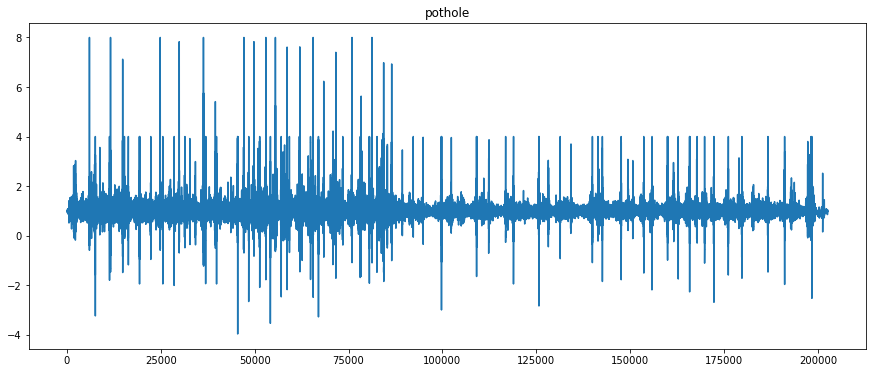

In [13]:
df[df['label'] == 'pothole' ].accelerationZ.plot.line(figsize=(15,6),title='pothole');


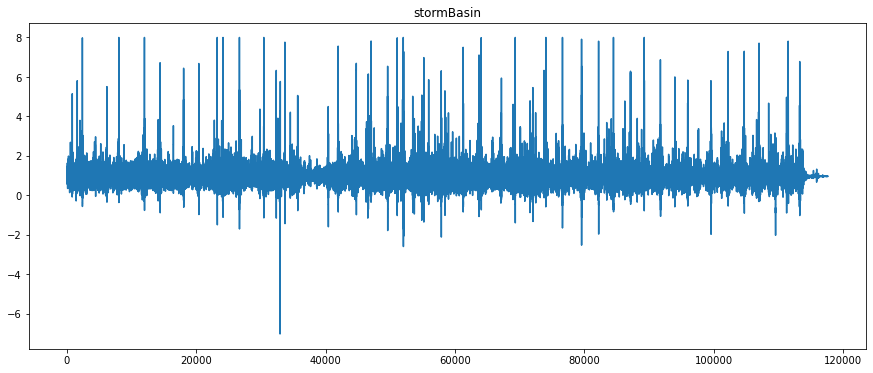

In [14]:
df[df['label'] == 'stormBasin' ].accelerationZ.plot.line(figsize=(15,6),title='stormBasin');

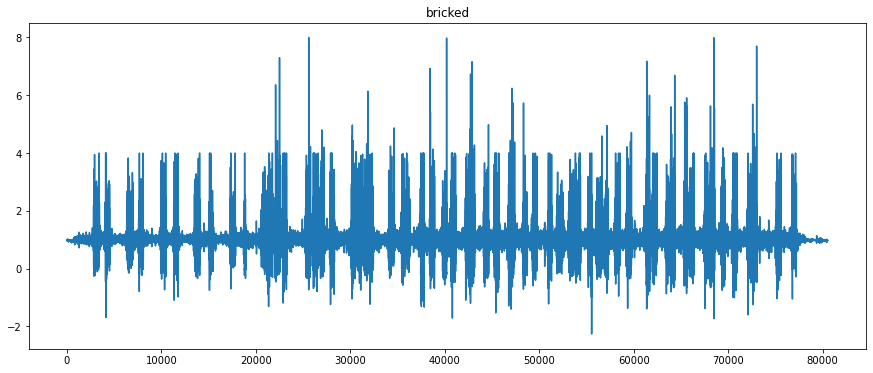

In [15]:
df[df['label'] == 'bricked' ].accelerationZ.plot.line(figsize=(15,6),title='bricked');

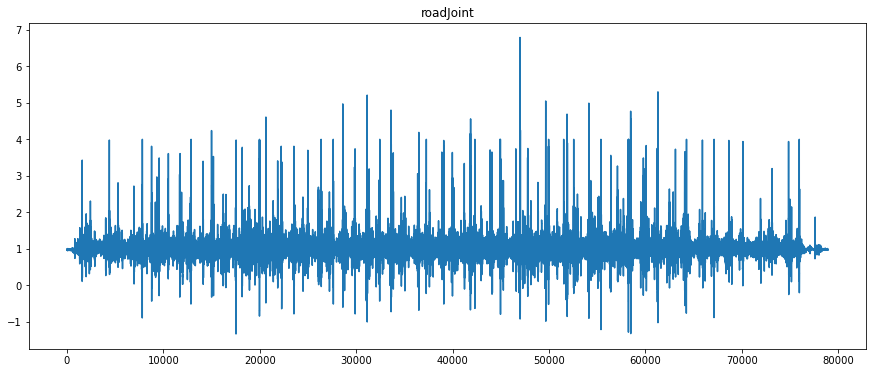

In [16]:
df[df['label'] == 'roadJoint' ].accelerationZ.plot.line(figsize=(15,6),title='roadJoint');

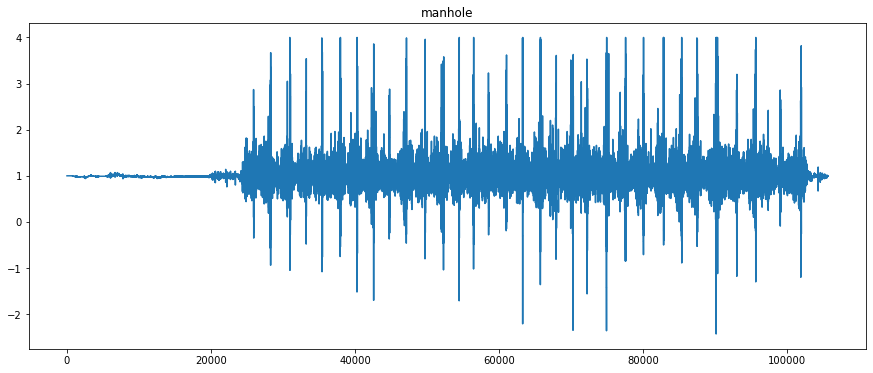

In [17]:
df[df['label'] == 'manhole' ].accelerationZ.plot.line(figsize=(15,6),title='manhole');

In [18]:
df.head()

,timeRelativeRef,samplingTime,accelerationX,accelerationY,accelerationZ,roll,pitch,yaw,label
0,536820,536820,-0.23,0.0,1.0,1.71,-7.39,-3.48,bricked
1,536895,75,-0.22,0.0,1.0,1.77,-7.39,-3.48,bricked
2,536911,16,-0.22,0.0,1.0,1.83,-7.32,-3.48,bricked
3,536915,4,-0.22,0.0,1.0,1.77,-7.26,-3.42,bricked
4,536918,3,-0.22,0.0,1.0,1.77,-7.26,-3.42,bricked
